In [ ]:
# Colab에서 구글 드라이브 마운트
from google.colab import drive
import pandas as pd


# 구글 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# 파일 경로 설정
file_path = '/content/drive/MyDrive/Colab Notebooks/창의학기제코딩플랫폼개발/data.csv'

# CSV 파일 불러오기 (첫 번째 줄을 데이터로 취급)
df = pd.read_csv(file_path, header=None)

# 첫 8개의 열만 선택
df_cleaned = df.iloc[:, :8]  # 첫 번째부터 8번째 열까지만 선택

# 컬럼에 이름 붙이기
df_cleaned.columns = ['problem_id', 'tier', 'correct_rate', 'submit', 'category', 'similar_problem', 'source', 'language']

# 데이터프레임 확인
df_cleaned.head(10)

,problem_id,tier,correct_rate,submit,category,similar_problem,source,language
0,10000번: 원 영역,17,36.34%,2377,"['보기', '자료 구조', '정렬', '기하학', '스택']",[],"['Contest', 'Croatian Open Competition in Info...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
1,10001번: Hash,17,20.10%,300,"['보기', '수학', '정수론', '비트마스킹', '분할 정복을 이용한 거듭제곱'...",[],"['Contest', 'Croatian Open Competition in Info...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
2,10003번: Tower Defense Game,18,50.00%,46,"['보기', '그래프 이론', '그래프 탐색']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
3,10004번: Bytecomputer,18,43.24%,82,"['보기', '다이나믹 프로그래밍', '그리디 알고리즘']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
4,10005번: Maze,25,33.33%,8,"['보기', '기하학', '해 구성하기']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
5,10006번: Colorful Chain,15,30.44%,154,"['보기', '두 포인터', '슬라이딩 윈도우']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
6,10007번: 레이저,20,15.63%,396,"['보기', '다이나믹 프로그래밍', '자료 구조', '기하학', '누적 합', '...",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
7,10008번: Polarization,24,35.40%,165,"['보기', '수학', '트리', '배낭 문제', '센트로이드']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
8,10009번: Loteria 2,8,77.78%,10,"['보기', '다이나믹 프로그래밍', '그리디 알고리즘', '해 구성하기']",[],"['Contest', 'Algorithmic Engagements', 'PA 2013']","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
9,1000번: A+B,1,38.80%,1163472,"['수학', '구현', '사칙연산']","['1001', '1008', '2558', '10950', '10951', '10...","['baekjoon', 'djm03178', 'doju']","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."


In [ ]:
total_rows = df.shape[0]
print(f"전체 행수: {total_rows}")

전체 행수: 30598


In [ ]:
nan_percentage = df_cleaned.isna().mean() * 100

# NaN 비율 출력
print("각 속성에서 값이 없는 비율 (%)")
print(nan_percentage)

각 속성에서 값이 없는 비율 (%)
problem_id         0.029414
tier               0.035950
correct_rate       0.055559
submit             0.065364
category           0.065364
similar_problem    0.071900
source             0.081705
language           0.088241
dtype: float64


In [ ]:
df_cleaned = df_cleaned.dropna(subset=['problem_id'])
nan_percentage = df_cleaned.isna().mean() * 100
# NaN 비율 출력
print("각 속성에서 값이 없는 비율 (%)")
print(nan_percentage)

각 속성에서 값이 없는 비율 (%)
problem_id         0.000000
tier               0.013077
correct_rate       0.032691
submit             0.042499
category           0.042499
similar_problem    0.049037
source             0.055576
language           0.058845
dtype: float64


In [ ]:
import re
import numpy as np  # NaN 처리를 위해 numpy를 불러옴
# 'problem_id'에서 숫자만 남기기 (숫자가 없으면 NaN 처리)
df_cleaned['problem_id'] = df_cleaned['problem_id'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else np.nan)

# 결과 확인
df_cleaned.head(10)

,problem_id,tier,correct_rate,submit,category,similar_problem,source,language
0,10000,17,36.34%,2377,"['보기', '자료 구조', '정렬', '기하학', '스택']",[],"['Contest', 'Croatian Open Competition in Info...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
1,10001,17,20.10%,300,"['보기', '수학', '정수론', '비트마스킹', '분할 정복을 이용한 거듭제곱'...",[],"['Contest', 'Croatian Open Competition in Info...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
2,10003,18,50.00%,46,"['보기', '그래프 이론', '그래프 탐색']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
3,10004,18,43.24%,82,"['보기', '다이나믹 프로그래밍', '그리디 알고리즘']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
4,10005,25,33.33%,8,"['보기', '기하학', '해 구성하기']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
5,10006,15,30.44%,154,"['보기', '두 포인터', '슬라이딩 윈도우']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
6,10007,20,15.63%,396,"['보기', '다이나믹 프로그래밍', '자료 구조', '기하학', '누적 합', '...",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
7,10008,24,35.40%,165,"['보기', '수학', '트리', '배낭 문제', '센트로이드']",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
8,10009,8,77.78%,10,"['보기', '다이나믹 프로그래밍', '그리디 알고리즘', '해 구성하기']",[],"['Contest', 'Algorithmic Engagements', 'PA 2013']","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."
9,1000,1,38.80%,1163472,"['수학', '구현', '사칙연산']","['1001', '1008', '2558', '10950', '10951', '10...","['baekjoon', 'djm03178', 'doju']","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11..."


In [ ]:
nan_percentage = df_cleaned.isna().mean() * 100
# NaN 비율 출력
print("각 속성에서 값이 없는 비율 (%)")
print(nan_percentage)

각 속성에서 값이 없는 비율 (%)
problem_id         0.062114
tier               0.013077
correct_rate       0.032691
submit             0.042499
category           0.042499
similar_problem    0.049037
source             0.055576
language           0.058845
dtype: float64


In [ ]:
df_cleaned = df_cleaned.dropna(subset=['problem_id'])
nan_percentage = df_cleaned.isna().mean() * 100
# NaN 비율 출력
print("각 속성에서 값이 없는 비율 (%)")
print(nan_percentage)

각 속성에서 값이 없는 비율 (%)
problem_id         0.000000
tier               0.006542
correct_rate       0.022898
submit             0.022898
category           0.022898
similar_problem    0.026169
source             0.026169
language           0.026169
dtype: float64


In [ ]:
total_rows = df_cleaned.shape[0]
print(f"전체 행수: {total_rows}")

전체 행수: 30570


In [ ]:
# 각 속성에서 NaN 값을 포함한 행을 삭제
df_cleaned = df_cleaned.dropna()

# 결과 확인
print(f"NaN 값을 제거한 후의 데이터프레임 행 수: {df_cleaned.shape[0]}")
nan_percentage = df_cleaned.isna().mean() * 100
# NaN 비율 출력
print("각 속성에서 값이 없는 비율 (%)")
print(nan_percentage)

NaN 값을 제거한 후의 데이터프레임 행 수: 30358
각 속성에서 값이 없는 비율 (%)
problem_id         0.0
tier               0.0
correct_rate       0.0
submit             0.0
category           0.0
similar_problem    0.0
source             0.0
language           0.0
dtype: float64


In [ ]:
# 티어 열의 최소값과 최대값 확인
tier_min = df_cleaned['tier'].min()
tier_max = df_cleaned['tier'].max()

# 최소값과 최대값 출력
print(f"티어의 최소값: {tier_min}")
print(f"티어의 최대값: {tier_max}")

티어의 최소값: -1
티어의 최대값: Ruby'


In [ ]:
# 'tier' 열에서 숫자가 아닌 값이 포함된 행의 인덱스를 추출하는 코드
non_numeric_tier_indices = df_cleaned[~df_cleaned['tier'].apply(lambda x: str(x).isdigit())].index

# 숫자가 아닌 값이 있는 행의 인덱스 출력
print("숫자가 아닌 값이 포함된 행의 인덱스:")
print(non_numeric_tier_indices.tolist())

숫자가 아닌 값이 포함된 행의 인덱스:
[230, 895, 906, 954, 985, 995, 996, 997, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1007, 1008, 1010, 1011, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1076, 1077, 1613, 2049, 2057, 2224, 2225, 2226, 2229, 2230, 2231, 2234, 2235, 2236, 2504, 2541, 2943, 3216, 3285, 3348, 3477, 3982, 4031, 4100, 4645, 4719, 4760, 4863, 5160, 5162, 5266, 5267, 5954, 6001, 6045, 6046, 6049, 6050, 6051, 6052, 6053, 6056, 6057, 6058, 6231, 6326, 6327, 6350, 6352, 6423, 6520, 6521, 6908, 6942, 6965, 6966, 6967, 6969, 6972, 6974, 6976, 7148, 7526, 7544, 7643, 7644, 7645, 7647, 7648, 7649, 7650, 7652, 7653, 7654, 7656, 7658, 7845, 8628, 8791, 8795, 8996, 9048, 9354, 9507, 9508, 9509, 9510, 9511, 9513, 9514, 9518, 9519, 9520, 9521, 9522, 10379, 10551, 10792, 12200, 12201, 12202, 12204, 12206, 12288, 12292, 12604, 12697, 13201, 13658, 13932, 14280, 14437, 14631, 14736, 14839, 14894, 15004, 15344, 15345, 15347, 15348, 15349, 15350, 15351, 15352, 15353, 15354, 15431, 16093, 16095, 16096, 16097, 1

In [ ]:
# 'tier' 열에서 숫자가 아닌 값을 가진 행을 삭제하는 코드
df_cleaned = df_cleaned[df_cleaned['tier'].apply(lambda x: str(x).isdigit())]

total_rows = df_cleaned.shape[0]
print(f"전체 행수: {total_rows}")

전체 행수: 30358


In [ ]:
# 'problem_id' 열을 숫자형(int)으로 변환
df_cleaned['problem_id'] = pd.to_numeric(df_cleaned['problem_id'], errors='coerce')

In [ ]:
# 변환 전의 problem_id가 10212인 행의 tier값 확인
tier_before = df_cleaned.loc[df_cleaned['problem_id'] == 10831, 'tier'].values

# 'tier' 열을 숫자형(float)으로 변환
df_cleaned['tier'] = pd.to_numeric(df_cleaned['tier'], errors='coerce')

# NaN 값을 제외한 나머지 값만 int로 변환 (음수 포함)
df_cleaned['tier'] = df_cleaned['tier'].apply(lambda x: int(x) if not pd.isna(x) else x)


# 변환 후의 problem_id가 10212인 행의 tier값 확인
tier_after = df_cleaned.loc[df_cleaned['problem_id'] == 10831, 'tier'].values

# 결과 출력
print(f"변환 전 tier 값: {tier_before}")
print(f"변환 후 tier 값: {tier_after}")

변환 전 tier 값: []
변환 후 tier 값: []


In [ ]:
# problem_id에 10831이 있는지 확인
print("problem_id가 10831인 행이 있는지 확인:")
print(df_cleaned[df_cleaned['problem_id'] == 10928])

# 변환 전의 problem_id가 10831인 행의 tier값 확인
tier_before = df_cleaned.loc[df_cleaned['problem_id'] == 10928, 'tier'].values

# 'tier' 열을 숫자형(float)으로 변환
df_cleaned['tier'] = pd.to_numeric(df_cleaned['tier'], errors='coerce')

# NaN 값을 제외한 나머지 값만 int로 변환 (음수 포함)
df_cleaned['tier'] = df_cleaned['tier'].apply(lambda x: int(x) if not pd.isna(x) else x)

# 변환 후의 problem_id가 10831인 행의 tier값 확인
tier_after = df_cleaned.loc[df_cleaned['problem_id'] == 10928, 'tier'].values

# 결과 출력
print(f"변환 전 tier 값: {tier_before}")
print(f"변환 후 tier 값: {tier_after}")

problem_id가 10831인 행이 있는지 확인:
Empty DataFrame
Columns: [problem_id, tier, correct_rate, submit, category, similar_problem, source, language]
Index: []
변환 전 tier 값: []
변환 후 tier 값: []


In [ ]:
# 'tier' 열을 숫자형(float)으로 변환
df_cleaned['tier'] = pd.to_numeric(df_cleaned['tier'], errors='coerce')

# NaN 값을 제외한 나머지 값만 int로 변환 (음수 포함)
df_cleaned['tier'] = df_cleaned['tier'].apply(lambda x: int(x) if not pd.isna(x) else x)


# 티어 열의 최소값과 최대값 확인
tier_min = df_cleaned['tier'].min()
tier_max = df_cleaned['tier'].max()

# 최소값과 최대값 출력
print(f"티어의 최소값: {tier_min}")
print(f"티어의 최대값: {tier_max}")

티어의 최소값: 0
티어의 최대값: 30


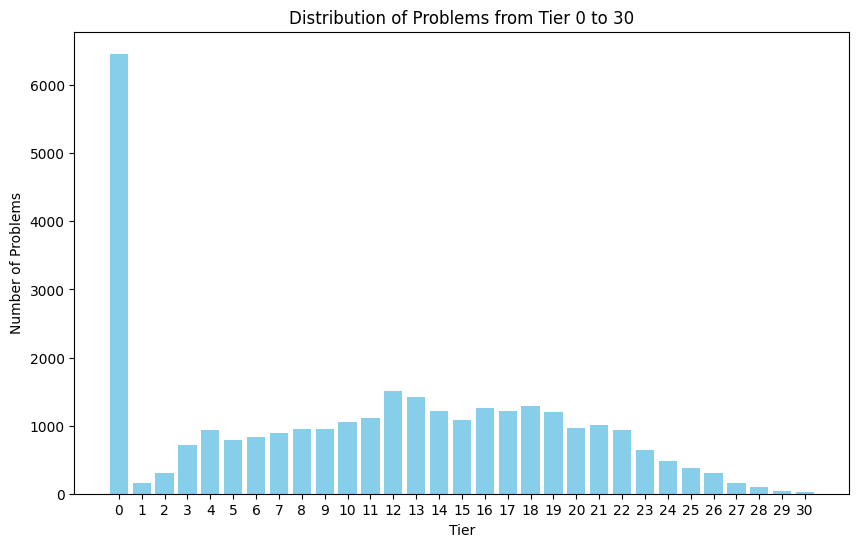

In [ ]:
import matplotlib.pyplot as plt
# 0부터 30까지의 티어 값 필터링
tier_filtered = df_cleaned[df_cleaned['tier'].between(0, 30)]

# 0부터 30까지 티어 값의 분포 계산
tier_counts = tier_filtered['tier'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(tier_counts.index, tier_counts.values, color='skyblue')
plt.xlabel('Tier')
plt.ylabel('Number of Problems')
plt.title('Distribution of Problems from Tier 0 to 30')
plt.xticks(range(0, 31, 1))
plt.show()

In [ ]:
# 0부터 30까지의 티어 값 필터링
tier_filtered = df_cleaned[df_cleaned['tier'].between(0, 30)]

# 0부터 30까지 티어 값의 분포 계산
tier_counts = tier_filtered['tier'].value_counts().sort_index()

# 숫자로 출력
print("0부터 30까지 티어 값의 분포 (숫자):")
print(tier_counts)

0부터 30까지 티어 값의 분포 (숫자):
tier
0     6462
1      154
2      306
3      717
4      934
5      793
6      827
7      888
8      948
9      947
10    1056
11    1113
12    1505
13    1424
14    1222
15    1087
16    1260
17    1210
18    1283
19    1200
20     963
21    1002
22     940
23     639
24     485
25     375
26     297
27     156
28      99
29      38
30      28
Name: count, dtype: int64


In [ ]:
def difficulty_category(tier):
    if 1 <= tier <= 5:
        return 0  # 아주 쉬움
    elif 6 <= tier <= 10:
        return 1  # 쉬움
    elif 11 <= tier <= 15:
        return 2  # 보통
    elif 16 <= tier <= 20:
        return 3  # 어려움
    elif 21 <= tier <= 30:
        return 4  # 아주 어려움
    else:
        return None  # 범위 밖의 값에 대해 None 처리

# 새로운 난이도 칼럼 추가
df_cleaned['difficulty'] = df_cleaned['tier'].apply(difficulty_category)

# 결과 확인
print(df_cleaned[['tier', 'difficulty']].head())

   tier  difficulty
0    17         3.0
1    17         3.0
2    18         3.0
3    18         3.0
4    25         4.0


In [ ]:
# 'correct_rate' 열에서 % 기호를 제거하고 숫자형으로 변환
df_cleaned['correct_rate'] = df_cleaned['correct_rate'].str.replace('%', '').astype(float)

# 'submit' 열을 숫자형(int)으로 변환
df_cleaned['submit'] = pd.to_numeric(df_cleaned['submit'], errors='coerce')

# 변환된 'correct_rate'와 'submit' 열의 일부 확인
print(df_cleaned[['correct_rate', 'submit']].head())

   correct_rate  submit
0         36.34    2377
1         20.10     300
2         50.00      46
3         43.24      82
4         33.33       8


In [ ]:
# 가중치 계산 함수 정의
def calculate_weight(correct_rate, submit):
    # 정답률이 낮을수록 가중치 증가 (1 - 정답률/100)
    correct_rate_weight = (1 - correct_rate / 100)

    # 제출 수가 많을수록 가중치 증가 (로그 스케일로 변환)
    if submit > 0:
        submit_weight = np.log10(submit)
    else:
        submit_weight = 0

    # 가중치의 범위를 0.0 ~ 0.9로 한정
    weight = correct_rate_weight * submit_weight
    return min(max(weight, 0.0), 0.9)

# 각 행에 대해 가중치를 계산
df_cleaned['calculated_weight'] = df_cleaned.apply(lambda row: calculate_weight(row['correct_rate'], row['submit']), axis=1)

# 전체 가중치의 평균 계산
mean_weight = df_cleaned['calculated_weight'].mean()

# 가중치 평균을 0.5로 맞추기 위한 스케일링 팩터 계산
scaling_factor = 0.5 / mean_weight

# 스케일링을 적용하여 가중치 조정
df_cleaned['scaled_weight'] = df_cleaned['calculated_weight'] * scaling_factor

# 조정된 가중치를 기존 difficulty에 더하기
df_cleaned['adjusted_difficulty'] = df_cleaned['difficulty'] + df_cleaned['scaled_weight']

# 결과 확인
print(f"가중치 평균 (스케일링 전): {mean_weight}")
print(f"스케일링 팩터: {scaling_factor}")
print(f"가중치 평균 (스케일링 후): {df_cleaned['scaled_weight'].mean()}")
print(df_cleaned[['tier', 'difficulty', 'correct_rate', 'submit', 'calculated_weight', 'scaled_weight', 'adjusted_difficulty']].head())


가중치 평균 (스케일링 전): 0.6083336873757869
스케일링 팩터: 0.8219173298734881
가중치 평균 (스케일링 후): 0.4999999999999999
   tier  difficulty  correct_rate  submit  calculated_weight  scaled_weight  \
0    17         3.0         36.34    2377           0.900000       0.739726   
1    17         3.0         20.10     300           0.900000       0.739726   
2    18         3.0         50.00      46           0.831379       0.683325   
3    18         3.0         43.24      82           0.900000       0.739726   
4    25         4.0         33.33       8           0.602090       0.494868   

   adjusted_difficulty  
0             3.739726  
1             3.739726  
2             3.683325  
3             3.739726  
4             4.494868  


In [ ]:
# 결과 확인
print(df_cleaned[['tier', 'difficulty', 'correct_rate', 'submit', 'calculated_weight', 'adjusted_difficulty']].head())

   tier  difficulty  correct_rate  submit  calculated_weight  \
0    17         3.0         36.34    2377           0.900000   
1    17         3.0         20.10     300           0.900000   
2    18         3.0         50.00      46           0.831379   
3    18         3.0         43.24      82           0.900000   
4    25         4.0         33.33       8           0.602090   

   adjusted_difficulty  
0             3.900000  
1             3.900000  
2             3.831379  
3             3.900000  
4             4.602090  


In [ ]:
# 기존 'calculated_weight', 'scaled_weight', 'difficulty' 속성 삭제
df_cleaned = df_cleaned.drop(columns=['calculated_weight', 'scaled_weight', 'difficulty'])

# 'adjusted_difficulty' 속성의 이름을 'difficulty'로 변경
df_cleaned.rename(columns={'adjusted_difficulty': 'difficulty'}, inplace=True)

# 결과 확인
print(df_cleaned[['tier', 'difficulty', 'correct_rate', 'submit']].head())

   tier  difficulty  correct_rate  submit
0    17    3.739726         36.34    2377
1    17    3.739726         20.10     300
2    18    3.683325         50.00      46
3    18    3.739726         43.24      82
4    25    4.494868         33.33       8


In [ ]:
df_cleaned.columns

Index(['problem_id', 'tier', 'correct_rate', 'submit', 'category',
       'similar_problem', 'source', 'language', 'difficulty'],
      dtype='object')

In [ ]:
import ast

# 'category' 열이 문자열로 저장되어 있을 경우 리스트로 변환
df_cleaned['category'] = df_cleaned['category'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 'category' 열에 있는 리스트를 그대로 사용하여 고유한 카테고리 추출
unique_categories = set()

# 리스트의 각 항목을 하나씩 집합에 추가
for categories in df_cleaned['category']:
    if isinstance(categories, list):  # 리스트인지 확인
        unique_categories.update(categories)

# 고유한 카테고리의 개수 출력
print(f"총 고유 카테고리 개수: {len(unique_categories)}")

# 고유 카테고리 목록 출력
print(f"고유 카테고리 목록: {unique_categories}")

총 고유 카테고리 개수: 205
고유 카테고리 목록: {'그래프 탐색', '해싱', '스플레이 트리', '센트로이드 분할', '고속 푸리에 변환', '정규 표현식', '많은 조건 분기', '희소 배열', '파싱', '밀러–라빈 소수 판별법', '번사이드 보조정리', '춤추는 링크', '배낭 문제', '가장 긴 증가하는 부분 수열: o(n log n)', '접미사 배열과 lcp 배열', '오일러 지표 (χ=v-e+f)', '로프', '유클리드 호제법', '다중 대입값 계산', '담금질 기법', '쌍대 그래프', '수치해석', '선인장', '오일러 경로', '하켄부시 게임', '플로이드–워셜', '안정 결혼 문제', '방향 비순환 그래프', '도형에서의 불 연산', '다각형의 넓이', '병렬 이분 탐색', '애드 혹', 'aliens 트릭', '오프라인 동적 연결성 판정', '스프라그–그런디 정리', '커넥션 프로파일을 이용한 다이나믹 프로그래밍', '매내처', '선형 계획법', '홀의 결혼 정리', '회문 트리', '라빈–카프', 'utf-8 입력 처리', "mo's", '비트 집합', '세그먼트 트리', '지수승강 보조정리', '데이크스트라', '통계학', '린드스트롬–게셀–비엔노 보조정리', '함수 개형을 이용한 최적화', '강한 연결 요소', '크누스 x', '소수 판정', '선형대수학', '최소 비용 최대 유량', '베이즈 정리', '휴리스틱', '비둘기집 원리', '위상 정렬', '삼분 탐색', '큐', '시뮬레이션', '키타마사', '레드-블랙 트리', '조합론', '스위핑', '트리 압축', '에라토스테네스의 체', '확률론', '도미네이터 트리', '볼록 껍질을 이용한 최적화', '비트마스킹', '벨만–포드', '볼록 다각형 내부의 점 판정', '반평면 교집합', '정렬', '쌍대성', '덱을 이용한 구간 최댓값 트릭', '머지 소트 트리', '최대 유량 최소 컷 정리', '플러드 필', '최단 경로', '헝가리안', '재귀', '중간에서 만나기'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 1. 카테고리 (사용한 알고리즘) 벡터화 - TF-IDF
df_cleaned['category_str'] = df_cleaned['category'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
category_tfidf_matrix = vectorizer.fit_transform(df_cleaned['category_str'])

In [ ]:
category_tfidf_matrix

<30358x298 sparse matrix of type '<class 'numpy.float64'>'
	with 133623 stored elements in Compressed Sparse Row format>

In [ ]:
# 카테고리 데이터를 문자열로 결합
df_cleaned['category_str'] = df_cleaned['category'].apply(lambda x: ' '.join(x))

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
category_tfidf_matrix = vectorizer.fit_transform(df_cleaned['category_str'])

# TF-IDF로 벡터화된 카테고리 데이터를 데이터프레임으로 변환
category_tfidf_df = pd.DataFrame(category_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 기존 데이터프레임과 결합 (원본 데이터프레임과 TF-IDF로 벡터화된 카테고리 데이터를 결합)
df_with_category_tfidf = pd.concat([df_cleaned.reset_index(drop=True), category_tfidf_df.reset_index(drop=True)], axis=1)


In [ ]:
df_with_category_tfidf.head()

,problem_id,tier,correct_rate,submit,category,similar_problem,source,language,difficulty,category_str,...,헝가리안,호제법,홀의,확률론,확장,회문,회전하는,휴리스틱,희소,히르쉬버그
0,10000,17,36.34,2377,"[보기, 자료 구조, 정렬, 기하학, 스택]",[],"['Contest', 'Croatian Open Competition in Info...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",3.739726,보기 자료 구조 정렬 기하학 스택,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,10001,17,20.10,300,"[보기, 수학, 정수론, 비트마스킹, 분할 정복을 이용한 거듭제곱, 모듈로 곱셈 역...",[],"['Contest', 'Croatian Open Competition in Info...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",3.739726,보기 수학 정수론 비트마스킹 분할 정복을 이용한 거듭제곱 모듈로 곱셈 역원 중간에서...,...,0.0,0.239673,0.0,0.0,0.312564,0.0,0.0,0.0,0.0,0.0
2,10003,18,50.00,46,"[보기, 그래프 이론, 그래프 탐색]",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",3.683325,보기 그래프 이론 그래프 탐색,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,10004,18,43.24,82,"[보기, 다이나믹 프로그래밍, 그리디 알고리즘]",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",3.739726,보기 다이나믹 프로그래밍 그리디 알고리즘,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,10005,25,33.33,8,"[보기, 기하학, 해 구성하기]",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",4.494868,보기 기하학 해 구성하기,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 'similar_problem' 열에서 데이터 값이 "[]"인 경우를 확인
empty_string_similar_problem_count = df_cleaned['similar_problem'].apply(lambda x: x == '[]').sum()

# 전체 데이터에서 데이터 값이 "[]"인 경우가 차지하는 비율 계산
total_data_count = df_cleaned.shape[0]
empty_string_similar_problem_ratio = empty_string_similar_problem_count / total_data_count * 100

# 결과 출력
print(f'데이터 값이 "[]"인 \'similar_problem\'의 개수: {empty_string_similar_problem_count}')
print(f'전체 데이터에서 데이터 값이 "[]"인 경우가 차지하는 비율: {empty_string_similar_problem_ratio:.2f}%')


데이터 값이 "[]"인 'similar_problem'의 개수: 30279
전체 데이터에서 데이터 값이 "[]"인 경우가 차지하는 비율: 99.74%


In [ ]:
# 'similar_problem' 속성 삭제
df_cleaned = df_cleaned.drop(columns=['similar_problem'])

# 결과 확인
df_cleaned.head()

KeyError: "['similar_problem'] not found in axis"

In [ ]:
# 결과 확인
df_cleaned.head()
df_with_category_tfidf.head()

,problem_id,tier,correct_rate,submit,category,similar_problem,source,language,difficulty,category_str,...,헝가리안,호제법,홀의,확률론,확장,회문,회전하는,휴리스틱,희소,히르쉬버그
0,10000,17,36.34,2377,"[보기, 자료 구조, 정렬, 기하학, 스택]",[],"['Contest', 'Croatian Open Competition in Info...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",3.739726,보기 자료 구조 정렬 기하학 스택,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,10001,17,20.10,300,"[보기, 수학, 정수론, 비트마스킹, 분할 정복을 이용한 거듭제곱, 모듈로 곱셈 역...",[],"['Contest', 'Croatian Open Competition in Info...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",3.739726,보기 수학 정수론 비트마스킹 분할 정복을 이용한 거듭제곱 모듈로 곱셈 역원 중간에서...,...,0.0,0.239673,0.0,0.0,0.312564,0.0,0.0,0.0,0.0,0.0
2,10003,18,50.00,46,"[보기, 그래프 이론, 그래프 탐색]",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",3.683325,보기 그래프 이론 그래프 탐색,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,10004,18,43.24,82,"[보기, 다이나믹 프로그래밍, 그리디 알고리즘]",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",3.739726,보기 다이나믹 프로그래밍 그리디 알고리즘,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,10005,25,33.33,8,"[보기, 기하학, 해 구성하기]",[],"['Olympiad', 'Polish Olympiad in Informatics',...","['C++17', 'Python 3', 'PyPy3', 'C99', 'Java 11...",4.494868,보기 기하학 해 구성하기,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# df_cleaned를 CSV 파일로 저장
df_cleaned.to_csv('df_cleaned_output.csv', index=False)

# 저장 완료 메시지 출력
print("CSV 파일로 저장되었습니다: df_cleaned_output.csv")


CSV 파일로 저장되었습니다: df_cleaned_output.csv


In [ ]:
from google.colab import files
files.download('df_cleaned_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>